![image.png](paramClass.png)
![image.png](methodsforclass.png)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

In [15]:
## Load the penguins dataset and drop instances with missing values
penguins = pd.read_csv('penguins.csv').dropna()

# Display first five rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


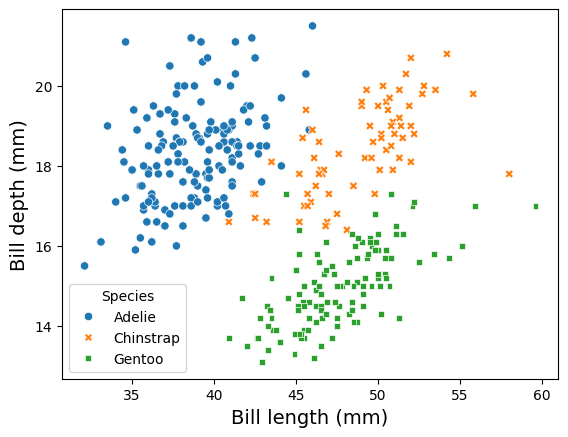

In [16]:
## Scatterplot of bill length and bill depth
p = sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                    hue='species', style='species')
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)
p.legend(title='Species')

In [17]:
# Create column with species saved as integer
penguins['species_int'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'], value = [int(0), int(1), int(2)])
penguins.head()

C:\Users\Gabe\AppData\Local\Temp\ipykernel_14912\3344270876.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguins['species_int'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'], value = [int(0), int(1), int(2)])


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_int
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0


In [30]:
# Define input features and output features
X = penguins[['bill_length_mm', 'bill_depth_mm']]
y = penguins[['species_int']]

In [31]:
# Initialize a model with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X, np.ravel(y))

# Calculate the predictions for each instance in X
knn.predict(X)

# Calculate the proportion of instances correctly classified
knn.score(X, np.ravel(y))

0.975975975975976

c:\Users\Gabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


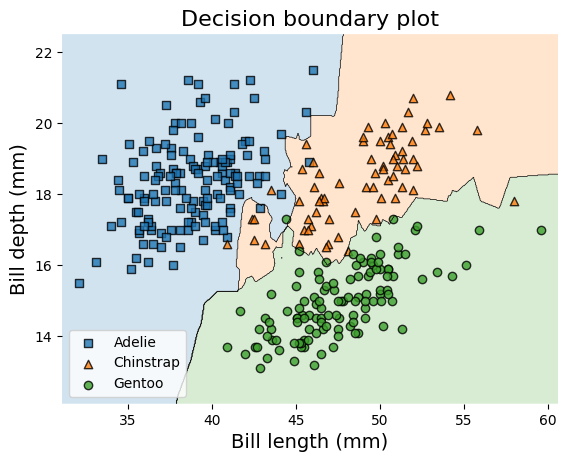

In [32]:
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y), clf=knn, contourf_kwargs=contourf_kwargs)

# Add title and axis labels
p.set_title('Decision boundary plot', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)

# Add legend 
L = plt.legend()
L.get_texts()[0].set_text('Adelie')
L.get_texts()[1].set_text('Chinstrap')
L.get_texts()[2].set_text('Gentoo')

In [21]:
# Use additional input features
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins[['species_int']]

In [22]:
# Initialize a model with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X, np.ravel(y))

# Calculate the predictions for each instance in X
knn.predict(X)

# Calculate the proportion of instances correctly classified
knn.score(X, np.ravel(y))

0.8378378378378378